<a href="https://colab.research.google.com/github/AnushkaDwivedi17/datathon/blob/master/linear_rgrsn_dl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sea

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data  = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/abalone_data/training_set_label.csv" )

In [3]:
data.head

<bound method NDFrame.head of      Sex  Length  Diameter  ...  Viscera weight  Shell weight  Rings
0      F   0.525     0.400  ...          0.1380        0.2080     10
1      F   0.445     0.325  ...          0.1125        0.1400      9
2      M   0.710     0.540  ...          0.2610        0.7800     18
3      F   0.680     0.580  ...          0.4530        0.6000     19
4      M   0.605     0.470  ...          0.2405        0.3450     12
...   ..     ...       ...  ...             ...           ...    ...
3127   M   0.415     0.315  ...          0.0870        0.0970      8
3128   I   0.325     0.240  ...          0.0305        0.0540      8
3129   M   0.565     0.455  ...          0.1830        0.2600     11
3130   M   0.610     0.485  ...          0.2255        0.2865      9
3131   F   0.655     0.505  ...          0.2745        0.4250     12

[3132 rows x 9 columns]>

In [5]:
data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,3132.000000,3132.000000,3132.000000,3132.00000,3132.000000,3132.000000,3132.000000,3132.000000
mean,0.523707,0.407952,0.139277,0.82867,0.359229,0.180731,0.239159,9.947957
std,0.119891,0.099336,0.038991,0.49063,0.221946,0.109924,0.139040,3.230252
min,0.110000,0.090000,0.000000,0.00800,0.002500,0.000500,0.003000,2.000000
25%,0.450000,0.350000,0.115000,0.44150,0.185375,0.093375,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.79950,0.335500,0.170000,0.235000,10.000000
75%,0.615000,0.480000,0.165000,1.15300,0.499500,0.252500,0.330000,11.000000
max,0.815000,0.650000,0.515000,2.82550,1.488000,0.760000,1.005000,29.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3132 entries, 0 to 3131
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             3132 non-null   object 
 1   Length          3132 non-null   float64
 2   Diameter        3132 non-null   float64
 3   Height          3132 non-null   float64
 4   Whole weight    3132 non-null   float64
 5   Shucked weight  3132 non-null   float64
 6   Viscera weight  3132 non-null   float64
 7   Shell weight    3132 non-null   float64
 8   Rings           3132 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 220.3+ KB


In [8]:
data.isna().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

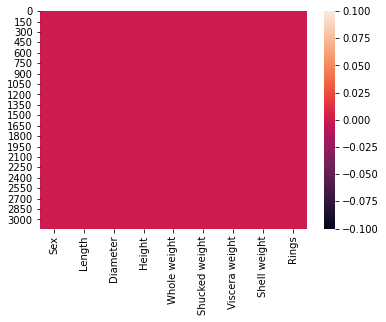

In [9]:
sea.heatmap(data.isna())

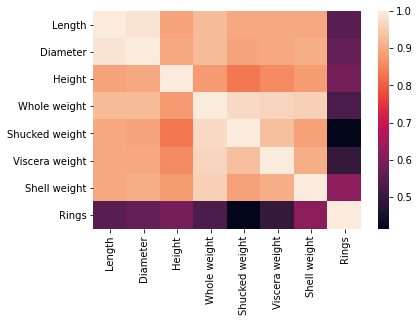

In [10]:
sea.heatmap(data.corr())

In [11]:
data=pd.get_dummies(data)

In [12]:
x=data.drop('Rings', axis = 1)
y=data.Rings

In [13]:
from sklearn.model_selection import train_test_split
x_tr,x_ts,y_tr,y_ts=train_test_split(x,y,test_size=0.3, random_state = 42)

In [14]:
n_features = x.shape[1]
print(n_features)

10


In [15]:
from tensorflow.keras import Sequential    # import Sequential from tensorflow.keras
from tensorflow.keras.layers import Dense  # import Dense from tensorflow.keras.layers
from numpy.random import seed     # seed helps you to fix the randomness in the neural network.  
import tensorflow

In [16]:
model = Sequential()
model.add(Dense(10, activation='relu', input_shape=(n_features,)))
model.add(Dense(8, activation='relu'))
model.add(Dense(1))

In [17]:
from tensorflow.keras.optimizers import RMSprop
optimizer = RMSprop(0.01)    # 0.01 is the learning rate

In [22]:
model.compile(loss='mean_squared_error',optimizer=optimizer)

In [23]:
seed_value = 42
seed(seed_value) 
# If you build the model with given parameters, set_random_seed will help you produce the same result on multiple execution

import os
os.environ['PYTHONHASHSEED']=str(seed_value)

# 2. Set `python` built-in pseudo-random generator at a fixed value
import random
random.seed(seed_value)

# 3. Set `numpy` pseudo-random generator at a fixed value
import numpy as np
np.random.seed(seed_value)
# Recommended by Keras -------------------------------------------------------------------------------------


# 4. Set the `tensorflow` pseudo-random generator at a fixed value
tensorflow.random.set_seed(seed_value) 
model.fit(x_tr, y_tr, epochs=10, batch_size=30, verbose = 1)    # fit the model

Epoch 1/10
74/74 [==============================] - 0s 893us/step - loss: 5.3295
Epoch 2/10
74/74 [==============================] - 0s 907us/step - loss: 5.3268
Epoch 3/10
74/74 [==============================] - 0s 1ms/step - loss: 5.2044
Epoch 4/10
74/74 [==============================] - 0s 872us/step - loss: 5.2293
Epoch 5/10
74/74 [==============================] - 0s 856us/step - loss: 5.1670
Epoch 6/10
74/74 [==============================] - 0s 892us/step - loss: 5.2166
Epoch 7/10
74/74 [==============================] - 0s 927us/step - loss: 5.0793
Epoch 8/10
74/74 [==============================] - 0s 883us/step - loss: 5.1244
Epoch 9/10
74/74 [==============================] - 0s 919us/step - loss: 5.0491
Epoch 10/10
74/74 [==============================] - 0s 935us/step - loss: 4.9349


In [24]:
model.evaluate(x_ts, y_ts)

30/30 [==============================] - 0s 787us/step - loss: 5.8742


5.874225616455078

Hyperparameter tuning

In [54]:
###################### Complete example to check the performance of the model with different learning rates #######################################
# define the model
model = Sequential()
model.add(Dense(10, activation='relu', input_shape=(n_features,)))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1))

optimizer = RMSprop(0.1)    # 0.1 is the learning rate
model.compile(loss='mean_squared_error',optimizer=optimizer)    # compile the model

# fit the model 
model.fit(x_tr, y_tr, epochs=10, batch_size=30, verbose = 1)

# evaluate the model
print('The MSE value is: ', model.evaluate(x_ts, y_ts))

Epoch 1/10
74/74 [==============================] - 0s 948us/step - loss: 80.6223
Epoch 2/10
74/74 [==============================] - 0s 976us/step - loss: 12.0637
Epoch 3/10
74/74 [==============================] - 0s 956us/step - loss: 9.6890
Epoch 4/10
74/74 [==============================] - 0s 951us/step - loss: 8.8001
Epoch 5/10
74/74 [==============================] - 0s 956us/step - loss: 8.1177
Epoch 6/10
74/74 [==============================] - 0s 947us/step - loss: 8.2202
Epoch 7/10
74/74 [==============================] - 0s 947us/step - loss: 7.7371
Epoch 8/10
74/74 [==============================] - 0s 954us/step - loss: 7.1872
Epoch 9/10
74/74 [==============================] - 0s 962us/step - loss: 7.0492
Epoch 10/10
30/30 [==============================] - 0s 968us/step - loss: 14.6046
The MSE value is:  14.604585647583008


In [73]:
learning_rate = 0.001       
epochs = 50        # Replace ? with an integer
optimizer = RMSprop(learning_rate)
model.compile(loss='mean_squared_error',optimizer=optimizer)    # Compile the model
model.fit(x_tr, y_tr, epochs=epochs, batch_size=50)       # Fit the model
model.evaluate(x_ts, y_ts)  

Epoch 1/50
44/44 [==============================] - 0s 1ms/step - loss: 4.7622
Epoch 2/50
44/44 [==============================] - 0s 1ms/step - loss: 4.7701
Epoch 3/50
44/44 [==============================] - 0s 1ms/step - loss: 4.7682
Epoch 4/50
44/44 [==============================] - 0s 959us/step - loss: 4.7701
Epoch 5/50
44/44 [==============================] - 0s 997us/step - loss: 4.7615
Epoch 6/50
44/44 [==============================] - 0s 1ms/step - loss: 4.7763
Epoch 7/50
44/44 [==============================] - 0s 948us/step - loss: 4.7648
Epoch 8/50
44/44 [==============================] - 0s 929us/step - loss: 4.7731
Epoch 9/50
44/44 [==============================] - 0s 927us/step - loss: 4.7689
Epoch 10/50
44/44 [==============================] - 0s 1ms/step - loss: 4.7688
Epoch 11/50
44/44 [==============================] - 0s 935us/step - loss: 4.7707
Epoch 12/50
44/44 [==============================] - 0s 937us/step - loss: 4.7645
Epoch 13/50
44/44 [================

4.708537578582764

In [74]:
test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/abalone_data/testing_set_label.csv')
test_data=pd.get_dummies(test_data)
tar=model.predict(test_data)
for i in tar:
  print(i[0],end=",")

9.798883,6.924064,7.3134313,12.297756,9.385026,12.711605,10.4951515,11.520469,10.4951515,9.2847805,10.4951515,11.07915,8.9823475,10.4951515,10.923193,10.796371,10.068738,7.0608892,5.5350432,10.799448,9.418603,13.2180805,10.525806,10.893513,12.331213,11.388077,11.665564,6.601899,11.511202,8.581881,9.563655,11.457589,11.389199,10.4951515,7.7054043,6.451602,12.997431,11.806629,10.4951515,9.71406,8.8470955,9.501793,6.4607987,12.07852,10.932482,23.245129,10.892751,11.042591,7.7232113,6.8674145,8.872448,10.783186,8.309409,9.166889,14.172825,14.938389,11.201809,6.5429916,6.8164277,9.449434,8.638985,11.4953575,4.689814,9.813496,9.711336,11.286259,10.911169,11.146864,10.617022,11.008455,11.331619,8.309843,12.570421,9.320808,10.522587,9.69858,7.360402,7.6300764,10.083292,10.152044,10.312317,6.094398,10.844941,9.8425865,7.501442,8.258425,12.515296,5.1326866,7.250574,12.917185,10.781089,11.875111,14.594757,8.734909,10.941095,10.4951515,9.518303,11.455788,10.239271,7.6554174,5.5393777,11.031246,12.